In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('data/simulations/raw/bending_Sim.txt', sep='\t')

In [54]:
df['acceleration_without_gravity_x~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket']

0       X-Acceleration w/o Gravity of STAHR_Rocket in ...
1                                         Meter/Second**2
2                                    9.67852498145304E+00
3                                    9.67852498145304E+00
4                                    9.67852498145304E+00
                              ...                        
1723                                -9.80224056912612E+00
1724                                -9.78800336589294E+00
1725                                -9.77015060305640E+00
1726                                -9.74868887106344E+00
1727                                -9.74868887106344E+00
Name: acceleration_without_gravity_x~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket, Length: 1728, dtype: object

In [55]:
print('\n'.join(map(str, zip(df.columns.values, df.loc[1]))))

df = df.drop([0, 1], axis=0)
df = df.astype(float)

('Phase', nan)
('acceleration_without_gravity_east~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket', 'Meter/Second**2')
('acceleration_without_gravity_north~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket', 'Meter/Second**2')
('acceleration_without_gravity_radial~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket', 'Meter/Second**2')
('acceleration_without_gravity_x~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket', 'Meter/Second**2')
('acceleration_without_gravity_y~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket', 'Meter/Second**2')
('acceleration_without_gravity_z~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket', 'Meter/Second**2')
('acceleration_without_gravity~STAHR_Rocket', 'Meter/Second**2')
('acceleration_x~STAHR_Rocket#J2000@Earth', 'Meter/Second**2')
('acceleration_y~STAHR_Rocket#J2000@Earth', 'Meter/Second**2')
('acceleration_z~STAHR_Rocket#J2000@Earth', 'Meter/Second**2')
('acceleration~STAHR_Rocket#J2000@Earth', 'Meter/Second**2')
('acc_aero_east~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket', 'Mete

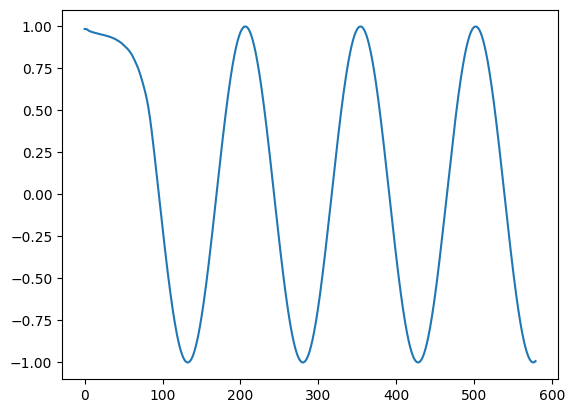

In [56]:
plt.plot(df['Time'], df['u_x~STAHR_Rocket#L~STAHR_Rocket:Earth'])
plt.show()

In [57]:
max(df['mach~STAHR_Rocket'])

2.5452011601288

In [58]:
df['latitude~STAHR_Rocket#PCPF~Earth@Earth']

2       67.885478
3       67.885478
4       67.885478
5       67.885478
6       67.885478
          ...    
1723    68.132323
1724    68.132323
1725    68.132323
1726    68.132323
1727    68.132323
Name: latitude~STAHR_Rocket#PCPF~Earth@Earth, Length: 1726, dtype: float64

In [59]:
df['declination~STAHR_Rocket#PCPF~Earth@Earth']

2       67.750938
3       67.750938
4       67.750938
5       67.750938
6       67.750938
          ...    
1723    67.998970
1724    67.998970
1725    67.998970
1726    67.998970
1727    67.998970
Name: declination~STAHR_Rocket#PCPF~Earth@Earth, Length: 1726, dtype: float64

In [60]:
df['longitude~STAHR_Rocket#PCPF~Earth@Earth']

2       21.079909
3       21.079909
4       21.079909
5       21.079909
6       21.079909
          ...    
1723    21.039219
1724    21.039219
1725    21.039219
1726    21.039219
1727    21.039219
Name: longitude~STAHR_Rocket#PCPF~Earth@Earth, Length: 1726, dtype: float64

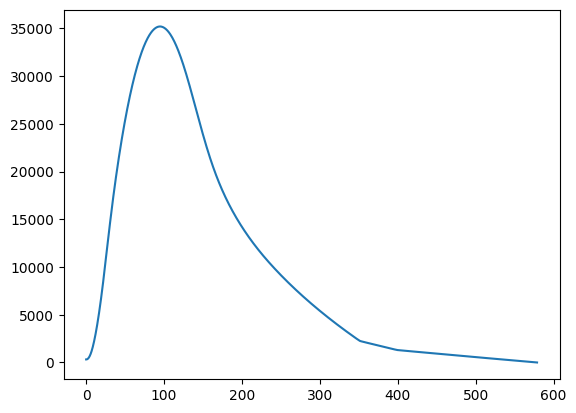

In [61]:
df['altitude~STAHR_Rocket@Earth'] * 1000

plt.plot(df['Time'], df['altitude~STAHR_Rocket@Earth'] * 1000)

In [62]:
df.at[2, 'altitude~STAHR_Rocket@Earth'] * 1000

318.99999999906896

In [63]:
import numpy as np

from spatz.dataset import T1, T2, T3
from math import pi

# Rename the columns
df = df.rename({
    'acceleration_without_gravity_x~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'ax_B',
    'acceleration_without_gravity_y~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'ay_B',
    'acceleration_without_gravity_z~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'az_B',
    'latitude~STAHR_Rocket#PCPF~Earth@Earth': 'latitude',
    'longitude~STAHR_Rocket#PCPF~Earth@Earth': 'longitude',
    'declination~STAHR_Rocket#PCPF~Earth@Earth': 'declination',
    'altitude~STAHR_Rocket@Earth': 'altitude',
    'pitch~STAHR_Rocket#L~STAHR_Rocket:Earth': 'pitch_l',
    'yaw~STAHR_Rocket#L~STAHR_Rocket:Earth': 'yaw_l',
    'roll~STAHR_Rocket#L~STAHR_Rocket:Earth': 'roll_l',
    'atmos_pressure~STAHR_Rocket': 'atmos_pressure',
    'atmos_temperature~STAHR_Rocket': 'atmos_temperature',
    'sonic_velocity~STAHR_Rocket': 'sonic_velocity',
    'OMEGA_X~STAHR_Rocket': 'OMEGA_X',
    'OMEGA_Y~STAHR_Rocket': 'OMEGA_Y',
    'OMEGA_Z~STAHR_Rocket': 'OMEGA_Z',
    'drag~STAHR_Rocket': 'drag',
    'flightpath_speed~STAHR_Rocket': 'flightpath_speed',
    'mass_total~STAHR_Rocket': 'mass_total',
    'mach~STAHR_Rocket': 'mach'
}, axis=1)

g = 9.81
t0 = df.at[2, 'Time']

vel = np.array([0, 0, 0], dtype='float64')
pos = np.array([318.99999999906896, 0, 0], dtype='float64')
time = t0

init_latitude = df.at[2, 'latitude'] * pi / 180
init_longitude = df.at[2, 'longitude'] * pi / 180

t0 = df.at[2, 'Time']
omega_E = (2*pi) / (24*60*60)

altitudes = [318.99999999906896]
velocities = [0]
acc_total = [0]

pitch, yaw, roll = df.at[2, 'pitch_l'] * pi / 180, df.at[2, 'yaw_l'] * pi / 180, df.at[2, 'roll_l'] * pi / 180
decl = df.at[2, 'declination'] * pi / 180

B_to_L = T1(yaw) @ T2(pi / 2 - pitch) @ T1(-roll)
G_to_LF = T2(-pi/2 - init_latitude) @ T3(init_longitude)

x_FL, y_FL, z_FL = [8.20214666930979e-13], [-1.51393643837011e-12], [-2.40063988328838e-12]
vx_FL, vy_FL, vz_FL = [0], [0], [0]
ax_FL, ay_FL, az_FL = [0], [0], [0]

for i in range(3, len(df)+2):
    dt = df.at[i, 'Time'] - df.at[i-1, 'Time']

    # Fetch values for the current time step.
    acc = np.array([df.at[i, 'ax_B'], df.at[i, 'ay_B'], df.at[i, 'az_B']])
    pitch, yaw, roll = df.at[i, 'pitch_l'] * pi / 180, df.at[i, 'yaw_l'] * pi / 180, df.at[i, 'roll_l'] * pi / 180
    decl = df.at[i, 'declination'] * pi / 180
    long = df.at[i, 'longitude'] * pi / 180

    B_to_L = T1(yaw) @ T2(pi / 2 - pitch) @ T1(-roll)
    L_to_G = np.linalg.inv(T2(-decl) @ T3(long + omega_E * t0))
    G_to_LF = T2(-pi/2 - init_latitude) @ T3(init_longitude)
    L_to_LF = G_to_LF @ L_to_G

    acc_L = B_to_L @ acc + np.array([-g, 0, 0])
    pos += dt * vel + 1/2*dt**2*acc_L
    vel += dt * acc_L

    pos_LF = -(L_to_LF @ pos)
    vel_LF = -(L_to_LF @ vel)
    acc_LF = -(L_to_LF @ acc_L)

    x_FL.append(pos_LF[0])
    y_FL.append(pos_LF[1])
    z_FL.append(pos_LF[2])

    vx_FL.append(vel_LF[0])
    vy_FL.append(vel_LF[1])
    vz_FL.append(vel_LF[2])

    ax_FL.append(acc_LF[0])
    ay_FL.append(acc_LF[1])
    az_FL.append(acc_LF[2])

    altitudes.append(pos[0])
    velocities.append(np.sqrt(vel[0]**2 + vel[1]**2 + vel[2]**2))
    acc_total.append(np.sqrt(acc[0]**2 + acc[1]**2 + acc[2]**2))

plt.plot(df['Time'], df['altitude'] * 1000, label='true')

plt.plot(df['Time'], altitudes, label='integrated')
plt.legend()
plt.show()

plt.plot(df['Time'], velocities, label='velocity')
plt.legend()
plt.show()

plt.plot(df['Time'], np.array(velocities) / 340, label='mach')
plt.legend()
plt.show()

print('x_FL')
plt.plot(df['Time'], x_FL)
plt.show()

print('y_FL')
plt.plot(df['Time'], y_FL)
plt.show()

print('z_FL')
plt.plot(df['Time'], z_FL)
plt.show()

print('vx_FL')
plt.plot(df['Time'], vx_FL)
plt.show()

print('vy_FL')
plt.plot(df['Time'], vy_FL)
plt.show()

print('vz_FL')
plt.plot(df['Time'], vz_FL)
plt.show()

print('acc')
plt.plot(df['Time'], ax_FL, label='ax')
plt.plot(df['Time'], ay_FL, label='ay')
plt.plot(df['Time'], az_FL, label='az')
plt.legend()
plt.show()

In [ ]:
max(np.array(acc_total) / g)

5.7964371935639445

In [ ]:
df['altitude'] * 1000

2       319.000000
3       319.000000
4       319.000000
5       319.000000
6       319.000000
           ...    
1723      9.596509
1724      6.411547
1725      3.227070
1726      0.043079
1727      0.043079
Name: altitude, Length: 1726, dtype: float64

In [ ]:
max(df['altitude'] * 1000)

35196.311584186704

In [ ]:
df['Time']

2         0.000000
3         0.025000
4         0.050000
5         0.050000
6         0.050000
           ...    
1723    577.348034
1724    577.800240
1725    578.252446
1726    578.704652
1727    578.704652
Name: Time, Length: 1726, dtype: float64

In [ ]:
df.insert(0, 'x_FL', np.array(x_FL) / 1000)
df.insert(0, 'y_FL', np.array(y_FL) / 1000)
df.insert(0, 'z_FL', np.array(z_FL) / 1000)

df.insert(0, 'vx_FL', np.array(vx_FL) / 1000)
df.insert(0, 'vy_FL', np.array(vy_FL) / 1000)
df.insert(0, 'vz_FL', np.array(vz_FL) / 1000)

df.insert(0, 'acc_total', np.array(acc_total))

df_new = df[[
    'Time',
    'Phase',
    'declination',
    'longitude',
    'latitude',
    'altitude',
    'x_FL',
    'y_FL',
    'z_FL',
    'vx_FL',
    'vy_FL',
    'vz_FL',
    'pitch_l',
    'yaw_l',
    'roll_l',
    'atmos_pressure',
    'atmos_temperature',
    'sonic_velocity',
    'mach',
    'OMEGA_X',
    'OMEGA_Y',
    'OMEGA_Z',
    'mass_total',
    'flightpath_speed', 
    'acc_total', 
    'drag'
]]

descriptions = pd.DataFrame.from_dict({
    'Time': ['Second'],
    'Phase': [None],
    'declination': ['Degree'],
    'longitude': ['Degree'],
    'latitude': ['Degree'],
    'altitude': ['Kilo-Meter'],
    'x_FL': ['Kilo-Meter'],
    'y_FL': ['Kilo-Meter'],
    'z_FL': ['Kilo-Meter'],
    'vx_FL': ['Kilo-Meter / Second'],
    'vy_FL': ['Kilo-Meter / Second'],
    'vz_FL': ['Kilo-Meter / Second'],
    'pitch_l': ['Degree'],
    'yaw_l': ['Degree'],
    'roll_l': ['Degree'],
    'atmos_pressure': ['Pascal'],
    'atmos_temperature': ['Kelvin'],
    'sonic_velocity': ['Meter / Second'],
    'mach': [None],
    'OMEGA_X': ['Radian / Second'],
    'OMEGA_Y': ['Radian / Second'],
    'OMEGA_Z': ['Radian / Second'],
    'mass_total': ['Mega-Gram'],
    'flightpath_speed': ['Kilo-Meter / Second'], 
    'acc_total': ['Meter/Second**2'], 
    'drag': ['Kilo-Newton']
}, dtype=str)

df_new = pd.concat([descriptions, df_new], axis=0)
df_new.to_csv('data/simulations/predicted_flight.csv', sep='\t')

'Time', yes

'Phase', yes

'declination', yes

'longitude', yes

'latitude', yes

'altitude', yes

'mach', yes

'sonic_velocity', yes

'x_FL', yes

'y_FL', yes

'z_FL', yes

'vx_FL', yes

'vy_FL', yes

'vz_FL', yes

'OMEGA_X', yes

'OMEGA_Y', yes

'OMEGA_Z', yes

'pitch_l', yes

'yaw_l', yes

'roll_l', yes

'flightpath_speed', yes

'acc_total',

'atmos_pressure', yes

'atmos_temperature', yes

'drag', yes

'mass_total', yes